# Project: Investigate a Dataset - No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset contains information about 110,527 medical appointments scheduled by patients in Brazil.The columns in the dataset are listed and described below.

* PatientId: a unieque identifier for the patient
* AppointmentID: a unique identifier for the appointment
* Gender: The patients gender, either female or male (there are no non-binary genders included)
* ScheduledDay: the day on which the patient scheduled the appointment
* AppointmentDay: the day on which the appointment was scheduled to occur
* Age: the patient's age
* Neighbourhood: the location of the hospital
* Scholarship: whether or not the patient was enrolled in the Brasilian welfare program Bolsa Família
* Hipertension: whether or not the patient had high blood pressure
* Diabetes: whether or not the patient had diabetes
* Alcoholism: whether or not the patient was alcoholic
* Handcap: whether or not the patient was handicapped
* SMS_received: whether or not the patient received a text messge reminder about the appointment
* No-show: true if the patient didn't show up, false otherwise


### Questions for Analysis
Is there a correlation between the patient's age and whether or not the appointment is a no-show? If so, what is the correlation?

Is there a correlation between how many days in advance an appointment is scheduled and whether or not the appointment is a no-show? If so, what is the correlation?

Do some hospitals have higher no-show rates than others?

In [1]:
import pandas as pd
import numpy as np

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# Load the data and print out a few lines.
df = pd.read_csv("Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
type(df['ScheduledDay'][0])

str

In [6]:
type(df['AppointmentDay'][0])

str

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Check which genders are included in the dataset.

In [8]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

Check how many patient IDs there are. Since there are 62,299 patient IDs, and 110,527 appointments, there are some patients who had multiple appointments.

In [9]:
df['PatientId'].nunique()

62299


### Data Cleaning
The ScheduledDay and Appointment day are both strings. In order to calculate how many days in advance an appointment was scheduled, they need to be converted to dates. The time of day at which an appointment was scheduled is not important, especially since the dataset does not include the time of day of the appointment.

In [10]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date

In [11]:
type(df['ScheduledDay'][0])

datetime.date

In [12]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date

In [13]:
type(df['AppointmentDay'][0])

datetime.date

Check for any appointments where the ScheduledDay is after the AppointmentDay. Remove these appointments.

In [14]:
df[df['ScheduledDay'] > df['AppointmentDay']]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
27033,7.839273e+12,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes
55226,7.896294e+12,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes
64175,2.425226e+13,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes
71533,9.982316e+14,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
72362,3.787482e+12,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes


In [15]:
df = df[df['ScheduledDay'] <= df['AppointmentDay']]

In [16]:
df[df['ScheduledDay'] > df['AppointmentDay']].count()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

As the results of calling describe() show, the minimum age is -1, which likely indicates a missing age. The maximum age in the dataset is 115, which is possible since the oldest person ever to have lived was 122 years old. In the following cells we will see that only one person has a missing age, so we will remove that person to avoid having their age interfere with the analysis assessing the correlation between age and not showing up for appointments.

In [17]:
df['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [18]:
df = df[df['Age'] > -1]
df['Age'].value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

All the data columns that will be used in the analysis have been cleaned. When we look at no-show rates for individual hospitals, we will remove appointments at hosoitals that lack enough data, but for the first two analyses we want to include those appointments. 

Do one final visual check by looking at the first and last lines of data.

In [21]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [22]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27,2016-06-07,54,MARIA ORTIZ,0,0,0,0,0,1,No


<a id='eda'></a>
## Exploratory Data Analysis

### Is there a correlation between the patient's age and whether or not the appointment is a no-show? If so, what is the correlation?

Start by looking at the distribution of patient ages. Include all appointments for each patient in case the patients were not the same age at all of their appointments.

In [23]:
df['Age'].describe()

count    110521.000000
mean         37.089386
std          23.109885
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [24]:
def all_data_hist(df, col_to_plot, title, xlabel):
    hist = df[col_to_plot].hist(bins=18, grid=False) #Use 18 bins as recommended by Sturges’ Rule
    hist.set_title(title)
    hist.set_xlabel(xlabel)
    hist.set_ylabel('Number of Appointments');

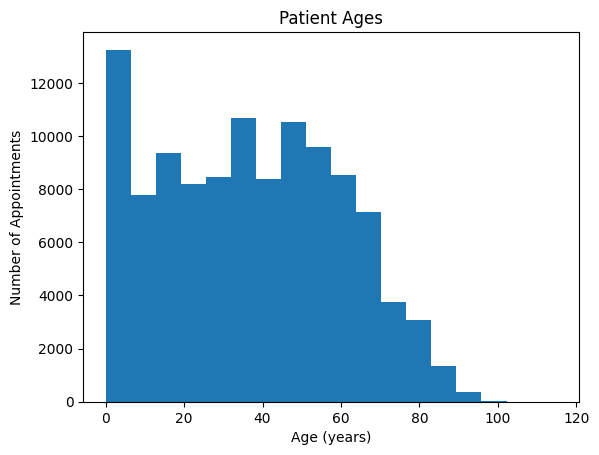

In [25]:
all_data_hist(df, 'Age', 'Patient Ages', 'Age (years)')

Now separate the appointments by whether or not the patient showed up.

In [26]:
no_shows = df[df['No-show'] == 'Yes']
no_shows.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes
11,7.542951e+12,5620163,M,2016-04-26,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
17,1.479497e+13,5633460,F,2016-04-28,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,Yes
20,6.222575e+14,5626083,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,Yes


In [27]:
shows =  df[df['No-show'] == 'No']
shows.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Now look at the distribution of ages for the two groups to see if they are different.

In [28]:
no_shows['Age'].describe()

count    22314.000000
mean        34.317872
std         21.965009
min          0.000000
25%         16.000000
50%         33.000000
75%         51.000000
max        115.000000
Name: Age, dtype: float64

In [29]:
shows['Age'].describe()

count    88207.000000
mean        37.790504
std         23.338645
min          0.000000
25%         18.000000
50%         38.000000
75%         56.000000
max        115.000000
Name: Age, dtype: float64

In [30]:
def show_no_show_hist(shows, no_shows, col_to_plot, title, xlabel):
    show_vs_noshow_hist = shows[col_to_plot].hist(bins=18, grid=False)
    show_vs_noshow_hist = no_shows[col_to_plot].hist(bins=18, grid=False)
    show_vs_noshow_hist.set_title(title)
    show_vs_noshow_hist.set_xlabel(xlabel)
    show_vs_noshow_hist.set_ylabel('Number of Appointments')
    show_vs_noshow_hist.legend(["Shows", "No-shows"])

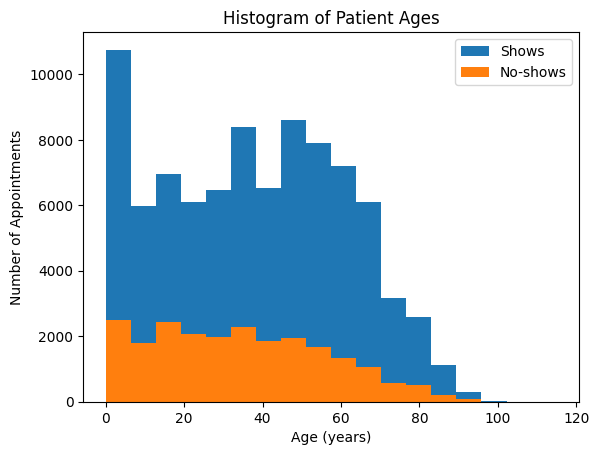

In [19]:
show_no_show_hist(shows, no_shows, 'Age', 'Histogram of Patient Ages', 'Age (years)')

Now look at the rate at which patients missed appointments, grouped by age.

In [33]:
def graph_no_show_rates(shows, no_shows, col_to_graph, title, xlabel):
    #calculate the no-show rate for each bin
    no_show_counts = no_shows[col_to_graph].value_counts(bins=18)
    show_counts = shows[col_to_graph].value_counts(bins=18)
    no_show_rates = no_show_counts / (no_show_counts + show_counts) * 100
    #plot the rates
    no_show_rate_hist = no_show_rates.plot.bar(grid=False)
    no_show_rate_hist.set_title(title)
    no_show_rate_hist.set_xlabel(xlabel)
    #generate xtick labels
    labels = []
    for idx in no_show_rates.index:
        labels.append(str(int(np.ceil(idx.left))) + "-" + str(int(idx.right)))
    no_show_rate_hist.set_xticks(ticks=no_show_rate_hist.get_xticks(), labels=labels)
    no_show_rate_hist.set_ylabel('Percent of Appointments Missed')

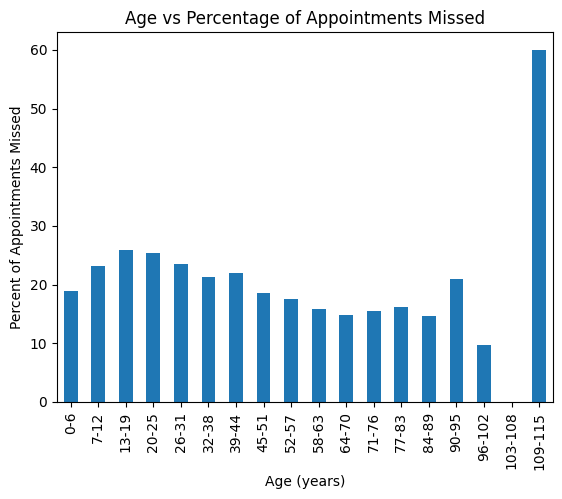

In [34]:
graph_no_show_rates(shows, no_shows, 'Age', 'Age vs Percentage of Appointments Missed', 'Age (years)')

There appears to be a slight correlation between patient age and whether or not the patient shows up for an appointment. The correlation between age and the percentage of appointments missed appears to be sinusoidal, but further statistical analysis is needed to confirm this as well as to investigate any causal relationship for the correlation.

### Is there a correlation between how many days in advance an appointment is scheduled and whether or not the appointment is a no-show? If so, what is the correlation?

In [35]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Add a column to the dataframe with how many days in advance the appointment was scheduled.

In [36]:
df["DaysInAdvance"] = (df["AppointmentDay"] - df["ScheduledDay"]).dt.days
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DaysInAdvance
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0
5,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,2
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2
8,5.639473e+13,5638447,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,0
9,7.812456e+13,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,2


View the distribution of how many days in advance appointments were scheduled. This gives an idea of how much we can trust any correlation we find. In this case we can see that any correlation we find can be most trusted to be accurate if the appointment was scheduled relatively few days in advance of the appointment. There is much less data to support any correlation we may find between appointments scheduled far in advance and how frequently they are missed. 

In [37]:
df["DaysInAdvance"].value_counts()

0      38562
2       6725
4       5290
1       5213
7       4906
       ...  
132        1
125        1
117        1
146        1
123        1
Name: DaysInAdvance, Length: 129, dtype: int64

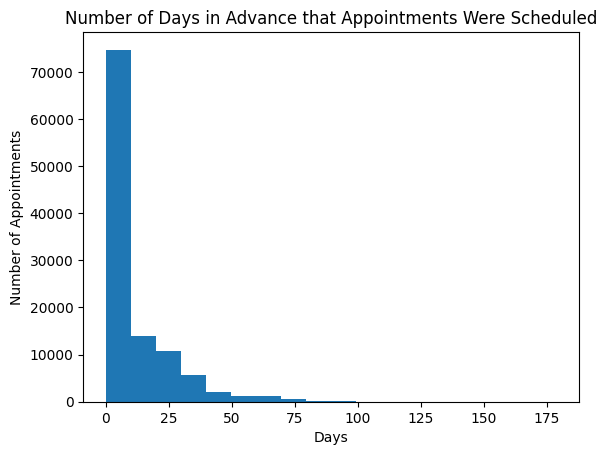

In [38]:
all_data_hist(df, "DaysInAdvance", "Number of Days in Advance that Appointments Were Scheduled", "Days")

Separate the data based on whether or not an appointment was a no-show.

In [39]:
no_shows = df[df['No-show'] == 'Yes']
no_shows.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DaysInAdvance
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2
11,7.542951e+12,5620163,M,2016-04-26,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,3
17,1.479497e+13,5633460,F,2016-04-28,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,Yes,1
20,6.222575e+14,5626083,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,Yes,2


In [40]:
shows = df[df['No-show'] == 'No']
shows.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DaysInAdvance
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


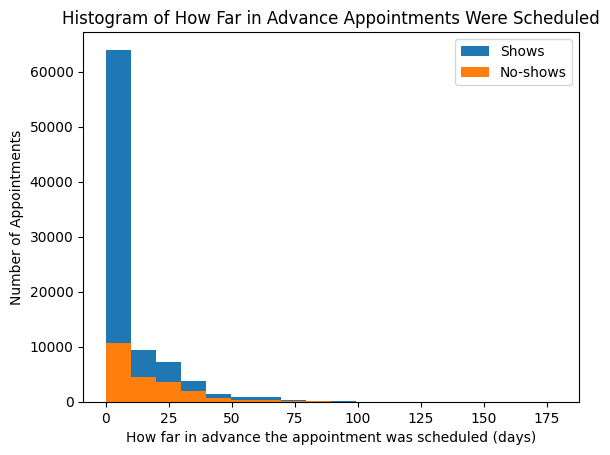

In [41]:
show_no_show_hist(shows, no_shows, 'DaysInAdvance', 'Histogram of How Far in Advance Appointments Were Scheduled', 'How far in advance the appointment was scheduled (days)')

Now look at the rate at which appointments are missed for each grouping of how many days in advance the appointment was scheduled.

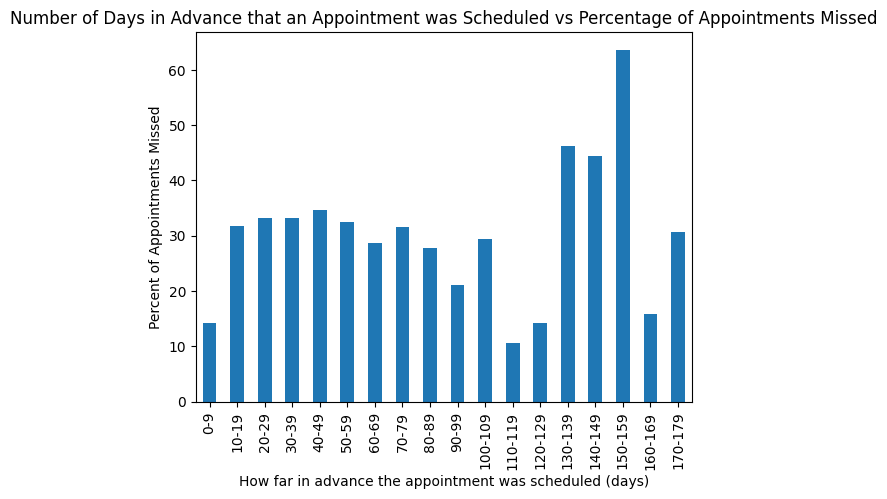

In [42]:
graph_no_show_rates(shows, no_shows, 'DaysInAdvance', 'Number of Days in Advance that an Appointment was Scheduled vs Percentage of Appointments Missed', 'How far in advance the appointment was scheduled (days)')

The above graphs show that appoinments scheduled 0 to 9 days in advance are more likely to be attended than appointments scheduled further in advance. As noted above, there is little data to support any correlation between the number of days in advance that an appointment was scheduled and the percent of appointments missed when the appoinment is scheduled far in advance.

### Do some hospitals have higher no-show rates than others?

Start by looking at how many hospitals there are and how much data we have about each one.

In [43]:
counts = df['Neighbourhood'].value_counts()
counts

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4430
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

Remove hospitals with fewer than 30 data points. We need enough data for the no-show rate to be meaningful.

In [44]:
keep = counts[counts >= 30]
df = df[df["Neighbourhood"].isin(keep.index)]
df['Neighbourhood'].value_counts()

JARDIM CAMBURI       7717
MARIA ORTIZ          5805
RESISTÊNCIA          4430
JARDIM DA PENHA      3877
ITARARÉ              3514
                     ... 
SEGURANÇA DO LAR      145
NAZARETH              135
MORADA DE CAMBURI      96
PONTAL DE CAMBURI      69
ILHA DO BOI            35
Name: Neighbourhood, Length: 77, dtype: int64

In [45]:
df['Neighbourhood'].value_counts().describe()

count      77.000000
mean     1435.064935
std      1367.796753
min        35.000000
25%       438.000000
50%      1035.000000
75%      2214.000000
max      7717.000000
Name: Neighbourhood, dtype: float64

Calculate the no-show rate for each hospital.

In [46]:
no_shows = df[df['No-show'] == 'Yes']
no_shows.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DaysInAdvance
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2
11,7.542951e+12,5620163,M,2016-04-26,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,3
17,1.479497e+13,5633460,F,2016-04-28,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,Yes,1
20,6.222575e+14,5626083,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,Yes,2


In [47]:
shows = df[df['No-show'] == 'No']
shows.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DaysInAdvance
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


In [48]:
no_show_counts = no_shows["Neighbourhood"].value_counts()
show_counts = shows["Neighbourhood"].value_counts()
no_show_rates = no_show_counts / (no_show_counts + show_counts) * 100
no_show_rates

ANDORINHAS             23.032714
ANTÔNIO HONÓRIO        18.450185
ARIOVALDO FAVALESSA    21.985816
BARRO VERMELHO         21.513002
BELA VISTA             20.136340
                         ...    
SÃO JOSÉ               21.648963
SÃO PEDRO              21.037582
TABUAZEIRO             18.268924
UNIVERSITÁRIO          21.052632
VILA RUBIM             16.568743
Name: Neighbourhood, Length: 77, dtype: float64

In [49]:
no_show_rates.describe()

count    77.000000
mean     19.887032
std       3.099710
min       8.571429
25%      18.064516
50%      19.758849
75%      21.745351
max      28.918495
Name: Neighbourhood, dtype: float64

Plot the rates to look for outliers.

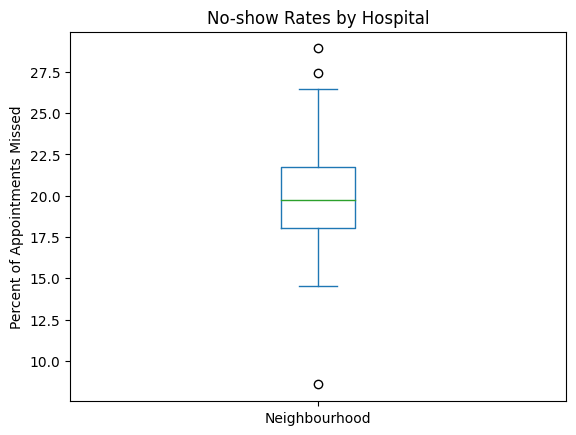

In [50]:
rate_box_plot = no_show_rates.plot.box()
rate_box_plot.set_title("No-show Rates by Hospital")
rate_box_plot.set_ylabel('Percent of Appointments Missed');

Find the neighborhoods of the hospitals which are outliers.

In [51]:
q1 = no_show_rates.quantile(0.25)
q3 = no_show_rates.quantile(0.75)
iqr = q3 - q1
#find the hospital with the very low no-show rate
low_rate = no_show_rates[no_show_rates < (q1 - 1.5*iqr)]
low_rate

ILHA DO BOI    8.571429
Name: Neighbourhood, dtype: float64

In [52]:
#find the hospitals with very high no-show rates
high_rate = no_show_rates[no_show_rates > (q3 + 1.5*iqr)]
high_rate

SANTA CECÍLIA    27.455357
SANTOS DUMONT    28.918495
Name: Neighbourhood, dtype: float64

Look for differences between the hospitals with high and low no-show rates.

In [59]:
#suppress scientific notation and round to 2 decimal places
pd.options.display.float_format = '{:.2f}'.format

In [56]:
df[df['Neighbourhood'] == low_rate.index[0]].mean(numeric_only = True)

PatientId       352854152984100.69
AppointmentID           5691378.74
Age                          48.63
Scholarship                   0.00
Hipertension                  0.11
Diabetes                      0.09
Alcoholism                    0.00
Handcap                       0.00
SMS_received                  0.20
DaysInAdvance                 4.14
dtype: float64

Look at the two hospitals with high no-show rates.

In [57]:
df[df['Neighbourhood'] == high_rate.index[0]].mean(numeric_only = True)

PatientId       149506277094983.25
AppointmentID           5634288.92
Age                          40.90
Scholarship                   0.06
Hipertension                  0.32
Diabetes                      0.07
Alcoholism                    0.00
Handcap                       0.03
SMS_received                  0.40
DaysInAdvance                21.95
dtype: float64

In [58]:
df[df['Neighbourhood'] == high_rate.index[1]].mean(numeric_only = True)

PatientId       167519650385520.00
AppointmentID           5663390.69
Age                          37.74
Scholarship                   0.18
Hipertension                  0.31
Diabetes                      0.11
Alcoholism                    0.03
Handcap                       0.01
SMS_received                  0.35
DaysInAdvance                12.27
dtype: float64

The hospitals with high no-show rates have slightly younger patients, and their appointments are scheduled significantly farther in advance, on average, than the hospital with the lowest no-show rate.This aligns with the previous finding that patients aged 39-44 have a slightly higher no-show rate than patients aged 45-51. It also aligns with the previous finding that appointments scheduled 0-9 days in advance have a much lower average no-show rate than appointments scheduled 19-29 days in advance. The correlations hold with the three hospitals that have unusually high and low no-show rates, but that doesn't mean the correlation is causal.

<a id='conclusions'></a>
## Conclusions
The above analyses uncovered the following correlations:
* Babies and young children as well as adults in their mid-fifties to mid-seventies are less likely to miss appointments. While there is a sharp rise in the percentage of appointments missed in patients over 108 years old, there are also very few patients in that age group, so any correlation should be viewed critically.
* Appoinments scheduled close to when they will be help are more likely to be attended than appointments scheduled further in advance. There is little data to support any collelation between the number of days in advance that an appointment was scheduled and the percent of appointments missed when the appoinment is scheduled far in advance.

In addition to the limitations due to availability of data, the analysis performed does not include statistical tests to determine the statistical significance of the correlations.

To better understand why some hospitals have higher no-show rates and take appropriate action steps to lower their rates, research is needed to explore any correlation between the other data included in the dataset and the no-show rates. Once correlations have been discovered, statistical analysis is necessary to identify which are statistically significant. Then research should be done to identify which of the statistically significant correlations are causal.

The correlations described above hold true for hospitals with the highest and lowest no-show rates.  The two hospitals with the highest no-show rates are those in the Santa Cecília and Santos Dumont neighborhoods. At both hospitals, over a quarter of the appointments are no-shows. These hospitals may want to invest in further research to identify the cause of their no-show rates and then look for ways to lower the rates. 

In [61]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 7 image(s).
[NbConvertApp] Writing 655064 bytes to Investigate_a_Dataset.html
